In [2]:
import pandas as pd
import numpy as np
import chunk
import re
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
#pd.set_option('display.max_columns',30)
#pd.set_option('display.max_rows',300)

## For more accurate information, I will focus on liquor stores only in the city of Des Moines. The following cells import each of the 6 portions of the now clean dataset and determine how many stores are in Des Moines.

In [3]:
#Checkpoint: read in all postloop files
f12=pd.read_csv('C://Users//Owner//DA//Classwork//0 Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//Jupyter Files//testrun//allclean12.csv')
f13=pd.read_csv('C://Users//Owner//DA//Classwork//0 Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//Jupyter Files//testrun//allclean13.csv')
f14=pd.read_csv('C://Users//Owner//DA//Classwork//0 Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//Jupyter Files//testrun//allclean14.csv')
f15=pd.read_csv('C://Users//Owner//DA//Classwork//0 Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//Jupyter Files//testrun//allclean15.csv')
f16=pd.read_csv('C://Users//Owner//DA//Classwork//0 Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//Jupyter Files//testrun//allclean16.csv')
f17=pd.read_csv('C://Users//Owner//DA//Classwork//0 Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//Jupyter Files//testrun//allclean17.csv')

C:\Users\Owner\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [76]:
f6 = (f12,f13,f14,f15,f16,f17)
counter = 12
for i in f6:
    print(counter)
    counter+=1
    i['Date']=pd.to_datetime(i['Date'])
    i['Store Number']=i['Store Number'].astype(str)
    i['Zip Code']=i['Zip Code'].astype(str)
    i['County Number']=i['County Number'].astype(str)
    i['Category']=i['Category'].astype(str)
    i['Vendor Number']=i['Vendor Number'].astype(str)
    i['Item Number']=i['Item Number'].astype(str)

12
13
14
15
16
17


In [77]:
print(f12.dtypes,f13.dtypes,f14.dtypes,f15.dtypes,f16.dtypes,f17.dtypes)

Unnamed: 0                        int64
Unnamed: 0.1                      int64
Unnamed: 0.1.1                    int64
Invoice/Item Number              object
Date                     datetime64[ns]
Store Number                     object
Store Name                       object
Address                          object
City                             object
Zip Code                         object
Store Location                   object
County Number                    object
County                           object
Category                         object
Category Name                    object
Vendor Number                    object
Vendor Name                      object
Item Number                      object
Item Description                 object
Pack                              int64
Bottle Volume (ml)                int64
State Bottle Cost               float64
State Bottle Retail             float64
Bottles Sold                      int64
Sale (Dollars)                  float64


In [13]:
#confirmed there is plenty of data in Des Moines to narrow the scope of the dataset
f6 = (f12,f13,f14,f15,f16,f17)
counter = 12
for i in f6:
    print('There were',i['Store Number'].nunique(),' stores in Des Moines in 20',counter, 'with',len(i[i['City']=='des moines']),' sales.')
    counter+=1

There were 1226  stores in Des Moines in 20 12 with 184093  sales.
There were 1274  stores in Des Moines in 20 13 with 182353  sales.
There were 1319  stores in Des Moines in 20 14 with 191156  sales.
There were 1375  stores in Des Moines in 20 15 with 190916  sales.
There were 1462  stores in Des Moines in 20 16 with 202139  sales.
There were 1494  stores in Des Moines in 20 17 with 168223  sales.


In [32]:
f6 = (f12,f13,f14,f15,f16,f17)
for i in f6:
    i=i[i['City']=="des moines"]

In [78]:
f6 = (f12,f13,f14,f15,f16,f17)
for i in f6:
    print(i.shape)

(184093, 28)
(182353, 28)
(191156, 28)
(190916, 28)
(202139, 28)
(168223, 28)


In [40]:
for i in f6:
    print(i.isna().sum())

Unnamed: 0               0
Unnamed: 0.1             0
Invoice/Item Number      0
Date                     0
Store Number             0
Store Name               0
Address                  0
City                     0
Zip Code                 0
Store Location           0
County Number            0
County                   0
Category                 0
Category Name            0
Vendor Number            0
Vendor Name              0
Item Number              0
Item Description         0
Pack                     0
Bottle Volume (ml)       0
State Bottle Cost        0
State Bottle Retail      0
Bottles Sold             0
Sale (Dollars)           0
Volume Sold (Liters)     0
Volume Sold (Gallons)    0
Year                     0
dtype: int64
Unnamed: 0               0
Unnamed: 0.1             0
Invoice/Item Number      0
Date                     0
Store Number             0
Store Name               0
Address                  0
City                     0
Zip Code                 0
Store Location 

In [17]:
f12=f12.reset_index(drop=True)

In [64]:
# des moines dataset checkpoint save
f12.to_csv('desmoines12.csv')
f13.to_csv('desmoines13.csv')
f14.to_csv('desmoines14.csv')
f15.to_csv('desmoines15.csv')
f16.to_csv('desmoines16.csv')
f17.to_csv('desmoines17.csv')

In [9]:
#Checkpoint: read in all postloop files
f12=pd.read_csv('C://Users//Owner//DA//Classwork//0 Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//Jupyter Files//testrun//desmoines12.csv')
f13=pd.read_csv('C://Users//Owner//DA//Classwork//0 Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//Jupyter Files//testrun//desmoines13.csv')
f14=pd.read_csv('C://Users//Owner//DA//Classwork//0 Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//Jupyter Files//testrun//desmoines14.csv')
f15=pd.read_csv('C://Users//Owner//DA//Classwork//0 Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//Jupyter Files//testrun//desmoines15.csv')
f16=pd.read_csv('C://Users//Owner//DA//Classwork//0 Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//Jupyter Files//testrun//desmoines16.csv')
f17=pd.read_csv('C://Users//Owner//DA//Classwork//0 Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//Jupyter Files//testrun//desmoines17.csv')

## First Column Cut

#### Cut Criteria (each column must meet one of the following):
#### - has 1 unique value (Unnamed: 0, Unnamed: 0.1, Invoice/Item Number)
#### - has no repeating values (City, County Number, County)
#### - has a 1:1 or ~1:1 relationship with a different column (Store Name, Address, Store Location, Category Name, Vendor Name, Volume Sold (Gallons))
#### - sure to have no affect on total materal cost (State Bottle Retail, Sale (Dollars))

In [10]:
f12.nunique()

Unnamed: 0               184093
Unnamed: 0.1             184093
Unnamed: 0.1.1           184093
Invoice/Item Number      184093
Date                        222
Store Number                 75
Store Name                   75
Address                      74
City                          1
Zip Code                     13
Store Location               75
County Number                 1
County                        1
Category                     73
Category Name                72
Vendor Number               101
Vendor Name                 101
Item Number                2484
Item Description           1772
Pack                         12
Bottle Volume (ml)           23
State Bottle Cost          1395
State Bottle Retail        1587
Bottles Sold                 92
Sale (Dollars)             6905
Volume Sold (Liters)        204
Volume Sold (Gallons)       200
Year                          1
dtype: int64

In [38]:
f12=f12.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Invoice/Item Number','Store Name','Address','City', 'Store Location','County Number','County','Category Name','Vendor Name','Volume Sold (Gallons)','State Bottle Retail','Sale (Dollars)'] ,axis=1)
f13=f13.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Invoice/Item Number','Store Name','Address','City', 'Store Location','County Number','County','Category Name','Vendor Name','Volume Sold (Gallons)','State Bottle Retail','Sale (Dollars)'] ,axis=1)
f14=f14.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Invoice/Item Number','Store Name','Address','City', 'Store Location','County Number','County','Category Name','Vendor Name','Volume Sold (Gallons)','State Bottle Retail','Sale (Dollars)'] ,axis=1)
f15=f15.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Invoice/Item Number','Store Name','Address','City', 'Store Location','County Number','County','Category Name','Vendor Name','Volume Sold (Gallons)','State Bottle Retail','Sale (Dollars)'] ,axis=1)
f16=f16.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Invoice/Item Number','Store Name','Address','City', 'Store Location','County Number','County','Category Name','Vendor Name','Volume Sold (Gallons)','State Bottle Retail','Sale (Dollars)'] ,axis=1)
f17=f17.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Invoice/Item Number','Store Name','Address','City', 'Store Location','County Number','County','Category Name','Vendor Name','Volume Sold (Gallons)','State Bottle Retail','Sale (Dollars)'] ,axis=1)

In [12]:
f6=(f12,f13,f14,f15,f16,f17)
for i in f6:
    print(i.shape)

(184093, 13)
(182353, 13)
(191156, 13)
(190916, 13)
(202139, 13)
(168223, 13)


In [98]:
f12.nunique()

Date                     222
Store Number              75
Zip Code                  13
Category                  73
Vendor Number            101
Item Number             2484
Item Description        1772
Pack                      12
Bottle Volume (ml)        23
State Bottle Cost       1395
Bottles Sold              92
Volume Sold (Liters)     204
Year                       1
dtype: int64

In [33]:
# des moines dataset checkpoint save
f12.to_csv('firstcut12.csv')
f13.to_csv('firstcut13.csv')
f14.to_csv('firstcut14.csv')
f15.to_csv('firstcut15.csv')
f16.to_csv('firstcut16.csv')
f17.to_csv('firstcut17.csv')

# ***

In [36]:
#Checkpoint: read in all postloop files
fc12=pd.read_csv('C://Users//Owner//DA//Classwork//0 Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//Jupyter Files//firstcut12.csv')
fc13=pd.read_csv('C://Users//Owner//DA//Classwork//0 Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//Jupyter Files//firstcut13.csv')
fc14=pd.read_csv('C://Users//Owner//DA//Classwork//0 Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//Jupyter Files//firstcut14.csv')
fc15=pd.read_csv('C://Users//Owner//DA//Classwork//0 Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//Jupyter Files//firstcut15.csv')
fc16=pd.read_csv('C://Users//Owner//DA//Classwork//0 Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//Jupyter Files//firstcut16.csv')
fc17=pd.read_csv('C://Users//Owner//DA//Classwork//0 Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//Jupyter Files//firstcut17.csv')

## Next: attempt to find relationships in remaining data including
### - bottle mL, bottle sold/pack, volume sold L
### - vendor number, item number, item description, state bottle cost

In [3]:
fc12.columns

Index(['Unnamed: 0', 'Date', 'Store Number', 'Zip Code', 'Category',
       'Vendor Number', 'Item Number', 'Item Description', 'Pack',
       'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail',
       'Bottles Sold', 'Sale (Dollars)', 'Volume Sold (Liters)', 'Year'],
      dtype='object')

In [4]:
fc12=fc12.drop(['Unnamed: 0'] ,axis=1)
fc13=fc13.drop(['Unnamed: 0'] ,axis=1)
fc14=fc14.drop(['Unnamed: 0'] ,axis=1)
fc15=fc15.drop(['Unnamed: 0'] ,axis=1)
fc16=fc16.drop(['Unnamed: 0'] ,axis=1)
fc17=fc17.drop(['Unnamed: 0'] ,axis=1)

In [5]:
fc12.columns

Index(['Date', 'Store Number', 'Zip Code', 'Category', 'Vendor Number',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Year'],
      dtype='object')

# ***

In [37]:
#Columns with numbers are automatically saved as numerical types despite dtype to conserve memory space. Thus, dtypes must
#be altered each time files are imported
fc6 = (fc12,fc13,fc14,fc15,fc16,fc17)
counter = 12
for i in fc6:
    print(counter)
    counter+=1
    i['Date']=pd.to_datetime(i['Date'])
    i['Store Number']=i['Store Number'].astype(str)
    i['Zip Code']=i['Zip Code'].astype(str)
    i['Category']=i['Category'].astype(str)
    i['Vendor Number']=i['Vendor Number'].astype(str)
    i['Item Number']=i['Item Number'].astype(str)

12
13
14
15
16
17


### Are unique Item Description, Item Number, State Bottle Cost, State Bottle Retail values occuring in the same pattern?

In [22]:
fc12.columns

Index(['Date', 'Store Number', 'Zip Code', 'Category', 'Vendor Number',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Year'],
      dtype='object')

In [7]:
fcset=(fc12,fc13,fc14,fc15,fc16,fc17)
for i in fcset:
    print(i.nunique())

Date                     222
Store Number              75
Zip Code                  13
Category                  73
Vendor Number            101
Item Number             2484
Item Description        1772
Pack                      12
Bottle Volume (ml)        23
State Bottle Cost       1395
State Bottle Retail     1587
Bottles Sold              92
Sale (Dollars)          6905
Volume Sold (Liters)     204
Year                       1
dtype: int64
Date                     227
Store Number              82
Zip Code                  13
Category                  74
Vendor Number            106
Item Number             2569
Item Description        1905
Pack                      13
Bottle Volume (ml)        22
State Bottle Cost       1374
State Bottle Retail     1567
Bottles Sold             111
Sale (Dollars)          7153
Volume Sold (Liters)     218
Year                       1
dtype: int64
Date                     216
Store Number              83
Zip Code                  13
Category         

In [23]:
fc12.head()

,Date,Store Number,Zip Code,Category,Vendor Number,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Year
0,2012-03-06,2532,50317,1082900.0,192.0,65256,jagermeister liqueur,12,750,11.58,17.37,12,208.44,9.00,12
1,2012-04-09,2633,50320,1012200.0,260.0,5289,j & b rare scotch,12,1000,14.98,22.47,12,269.64,12.00,12
2,2012-01-17,2959,50310,1062200.0,35.0,43038,bacardi gold rum,6,1750,14.67,22.00,6,132.00,10.50,12
3,2012-08-22,2955,50310,1042100.0,260.0,28866,tanqueray gin,12,750,12.00,17.99,12,215.88,9.00,12
4,2012-04-27,4669,50312,1051150.0,885.0,901167,williams pear brandy,3,750,19.87,29.81,3,89.43,2.25,12


In [29]:
fc12['Item Number'].head()

0     65256
1      5289
2     43038
3     28866
4    901167
Name: Item Number, dtype: object

In [30]:
fc12['Item Description'].nunique()

1772

In [31]:
fc12['Item Number'].nunique()

2484

In [54]:
for i in fc12['Item Number'].unique():
    print(i, fc12[fc12['Item Number']==i]['Item Description'].unique())

65256 ['jagermeister liqueur']
5289 ['j & b rare scotch']
43038 ['bacardi gold rum']
28866 ['tanqueray gin']
901167 ['williams pear brandy']
86390 ['montezuma triple sec']
19067 ['jim beam']
82847 ['dekuyper peachtree']
34561 ['pearl coconut vodka']
11290 ['crown royal canadian whisky mini']
64858 ['fireball cinnamon whiskey mini dispenser']
42666 ['mt. gay eclipse rum']
64762 ['ciroc red berry']
87938 ['juarez tequila silver']
35416 ["burnett's vodka 80 prf"]
46504 ['kraken black spiced rum']
89193 ['jose cuervo especial reposado tequila']
67266 ['yukon jack canadian liqueur']
34198 ['ciroc super premium vodka']
73050 ['rumchata']
27577 ['red stag honey tea']
11297 ['crown royal canadian whisky']
11777 ['black velvet']
82607 ['dekuyper sour apple']
36306 ['hawkeye vodka']
11786 ['black velvet traveler']
25608 ['seagrams 7 crown bl whiskey']
25606 ['seagrams 7 crown bl whiskey']
34817 ['svedka']
65199 ['tequila rose liqueur']
82187 ['arrow spearmint schnapps']
37986 ['skyy vodka']
4302

34076 ['absolut vanilia']
68846 ["st. brendan's superior irish cream liqueur"]
43024 ['admiral nelson spiced rum']
48104 ['hennessy vs cognac']
10008 ['scoresby rare scotch']
34423 ['grey goose vodka']
57157 ["chi-chi's pina colada w/rum"]
65065 ['goldschlager cinnamon schnapps']
34164 ['ciroc luxury vodka']
37998 ['smirnoff vodka 80 prf']
57148 ["chi-chi's margarita w/tequila"]
47790 ['courvoisier vs cognac']
903711 ['hangar one mandarine vodka']
35913 ["five o'clock vodka"]
80456 ["ryan's cream liqueur"]
43121 ['bacardi superior rum mini']
37346 ['phillips vodka']
43137 ['bacardi limon']
55506 ['paramount cherry flavored brandy']
38008 ['smirnoff vodka 80 prf pet']
52596 ['e & j vs']
41694 ['uv blue (raspberry) vodka']
14192 ['pendleton canadian whisky']
43128 ['bacardi superior rum']
43124 ['bacardi superior rum']
43244 ['captain morgan 100 proof spiced rum']
34935 ['three olives vodka']
89121 ['cazadores reposado']
89212 ['jose cuervo black medallion']
22784 ["beam's 8 star bl whis

31473 ['new amsterdam gin']
52316 ['christian bros brandy']
10834 ['crown royal black']
32236 ['seagrams extra dry gin']
34032 ['absolut citron (lemon vodka)']
68037 ["bailey's original irish cream"]
84172 ['99 bananas mini']
36904 ['mccormick vodka pet']
69945 ['rumple minze peppermint schnapps liqueur']
903441 ['sauza cien anos reposado tequila']
41360 ['uv pink lemonade vodka']
35926 ["five o'clock pet vodka"]
5326 ['johnnie walker black']
58873 ['jose cuervo authentic watermelon margarita']
82837 ['dekuyper raspberry pucker']
35147 ['three olives mango flavored vodka']
902202 ['gran centenario plata']
89099 ['cazadores anejo']
37414 ['popov vodka 80 prf']
73517 ['dekuyper cactus juice']
68126 ["carolan's irish cream liqueur"]
80576 ['arrow peppermint schnapps']
17958 ['evan williams yr str bourbon']
19235 ['knob creek single barrel reserve']
27323 ["two jay's country style blended why."]
46350 ['hawkeye light rum']
57125 ["chi-chi's gold margarita"]
19063 ['jim beam']
11771 ['black

33983 ['absolut berri acai']
42687 ['malibu black']
40632 ['uv whipped']
53218 ['paul masson grande amber brandy']
4636 ['bowmore 12 yr single malt scotch']
43209 ['bacardi black razz']
69940 ['rumple minze peppermint mini']
83906 ['maui blue hawaiian schnapps']
16987 ['bourbon supreme bourbon']
45247 ['paramount gold rum']
64742 ['ciroc coconut vodka']
42167 ["myers's rum original dark"]
64862 ['fireball cinnamon whiskey']
41901 ['ursus blue raspberry vodka']
16676 ['basil hayden 8yr']
19476 ["maker's mark"]
42316 ['malibu sunshine pet mini']
67527 ['kahlua coffee liqueur']
35315 ['barton vodka pet']
82827 ['dekuyper rootbeer']
35702 ['pearl orange vodka']
54646 ['arrow blackberry flav brandy']
27081 ['(ri)1 rye']
52599 ['e & j vs brandy round']
86881 ['southern comfort mini']
73715 ['evan williams cherry reserve']
52186 ['christian bros grand reserve vsop']
43197 ['bacardi torched cherry']
35944 ["fleischmann's royal vodka"]
25607 ['seagrams 7 crown bl whiskey']
48146 ['hennessy blac

84486 ['paramount butterscotch schnapps']
89788 ['sauza gold']
57174 ["chi-chi's skinny margarita"]
86888 ['southern comfort pet']
5446 ['laphroaig 10 yr single malt scotch']
41922 ['smirnoff peach vodka']
68842 ["st. brendan's superior irish cream liqueur"]
71529 ['tooters ala bama slama']
5103 ['glenmorangie lasanta']
35915 ['three olives supercola flavored vodka']
41688 ['uv blue raspberry vodka traveller']
901066 ['italian brandy']
36821 ['little black dress vodka']
43116 ['bacardi o']
24454 ['kessler blend whiskey']
73702 ['evan williams honey']
57158 ["chi-chi's strawberry margarita w/tequila"]
41625 ['uv grape vodka']
9426 ['passport scotch']
63755 ['tgi fridays mudslide']
43287 ['captain morgan parrot bay mango']
413 ['jim beam white triage']
10009 ['scoresby rare scotch']
40678 ['pucker vodka lemonade lust']
3120 ["jack daniel's tennessee honey w/2 glasses"]
22156 ['wild turkey 101']
37988 ['skyy vodka']
27508 ['jeremiah weed cherry mash']
904800 ['pyrat xo reserve']
5104 ["gl

9278 ['old smuggler scotch pet']
46113 ['clearheart rum']
27479 ['cody road bourbon']
89533 ['familia camarena reposado']
41670 ["burnett's blue raspberry vodka"]
35953 ['pinnacle pineapple']
13388 ['northern light']
3373 ['kahlua sampler pack']
41320 ["burnett's watermelon"]
73729 ['evan williams kentucky cider']
43415 ['captain morgan lime bite']
52317 ['christian bros brandy-square']
32235 ['seagrams extra dry gin pet']
89946 ['two fingers gold tequila']
904480 ['cruzan black strap rum']
904856 ['tortuga banana rum']
55246 ['arrow wild cherry flav brandy']
52595 ['e & j vs brandy travelers']
35907 ['pinnacle cookie dough']
82849 ['dekuyper peachtree schnapps pet']
34318 ['finlandia redberry']
36667 ['korski vodka']
34546 ['pearl vodka']
23277 ['calvert extra bl whiskey']
3655 ['herradura silver']
935632 ['sobieski orange']
10831 ['crown royal black mini']
40669 ['360 glazed donut']
40647 ['360 buttered popcorn mini']
68047 ["bailey's hazelnut irish cream"]
62061 ['kahlua frozen muds

12463 ['canadian mist whisky']
34138 ['chambord flavored vodka']
35770 ['pinnacle cherry whipped']
901009 ['absinthe blanco']
30057 ["fleischmann's dry gin"]
901100 ['mango limes']
41927 ["burnett's fruit punch"]
74470 ['hiram walker caramel apple liqueur']
41940 ['360 madagascar vanilla vodka']
88147 ['montezuma white tequila']
67546 ['kahlua hazelnut']
62422 ['margaritaville skinny island punch']
904922 ['dt nc2 1993 aberlour 16yr']
62405 ['margaritaville last mango margarita']
901050 ['ginger liqueur']
901038 ['apricot grappa']
83927 ['maui tropical schnapps']
27535 ['queen bee honey whiskey']
901904 ['sour cherry']
43183 ['bacardi rock coconut']
902153 ['peter heering cherry liqueur']
40661 ['skyy infusions coconut']
904837 ['wild turkey rare breed']
900623 ['fernandez brandy de jerez']
59102 ['evan williams peppermint chocolate egg nog']
3676 ['herradura blanco silver 6x6 tequila']
903056 ['remy martin louis xiii cognac']
12888 ['rich & rare canadian whisky']
44331 ['calypso cocon

5620 ['mcclelland speyside scotch']
64593 ['canadian club dock 57 blackberry']
77558 ["thatcher's blood orange"]
905206 ['yahara bay gin']
903442 ['nuvo']
27318 ["two jay's iowa corn whiskey"]
74165 ['grand muriel orange liqueur']
903275 ["jefferson's reserve st bbn whiskey"]
905777 ['yahara bay lemoncello']
903761 ['sazerac 18yr rye ha']
900801 ['blair athol cask']
67600 ['karimba coffee liqueur']
902749 ["beam's choice 5yr bourbon dno"]
37097 ['mr. boston riva vodka']
905310 ['yahara bay vodka']
34566 ['pearl vodka pet']
15997 ['penderyn single malt welsh whiskey']
3637 ['jose cuervo especial max pack']
16186 ['j.w. dant 100 prf bond bourbon']
901116 ['latte machiatto']
33282 ["seagram's pineapple twisted"]
901065 ['blair athol']
87945 ['kah blanco mini']
901023 ['isle of arran']
905309 ['yahara bay vodka']
900631 ['glen garioch']
24466 ['kessler blend whiskey traveler']
2878 ['absolut zing zang bloody mary mix']
902157 ['torres 10 gran reserva imperial brandy']
905083 ['yahara bay a

901087 ['kirsch cherry brandy']
903613 ['plymouth gin 6pak dno']
904611 ['1921 tequila cream']
902471 ['chamucos tequila']
941941 ['360 bing cherry']
903510 ['remy martin vsop']
77562 ["thatcher's cucumber"]
903544 ['glengoyne 17yr scotch']
901013 ['ardmore']
40667 ['360 glazed donut mini']
902678 ['paul masson vsop brandy']
89489 ['kah reposado mini']
12668 ['canadian woods canadian why']
904808 ['cazadores reposado']
74760 ['hot rose cinnamon cream liqueur mini']
901095 ['laphroaig']
903388 ['finlandia mango fusion']
59100 ['evan williams egg nog']
904130 ['xtabentun']
900632 ['glen garioch']
903697 ['milagro tequila sbr reposado']
43457 ['don q limon']
901333 ['dailuaine 29yr']
904649 ['lonach blended scotch 1973 36yr']
10815 ['crown royal maple mini']
27101 ['e.h. taylor jr. straight rye whiskey']
41079 ['jeremiah weed sweet tea mini']
904984 ['wolfschmidt']
904009 ['cruzan single barrel rum']
901285 ['yahara bay american rye whiskey']
904795 ['dimple pinch(haig & haig)']
901028 ['

904581 ['tia maria coffee liqueur']
904806 ['zaya rum']
904601 ['uv red(cherry) vodka']
904940 ['aberlour 18yr']
56838 ['bacardi cocktails mojito light']
904529 ['tanqueray rangpur']
903608 ['bunnahabhain 18yr']
902658 ['pitu cachaca']
901256 ['glengoyne']
904794 ['laphroaig quarter cask']
64016 ['achaia clauss ouzo greek liqueur']
903957 ['sheep dip orig oldbury malt scotch']
40608 ["burnett's maple syrup"]
964068 ['alize red passion']
902427 ['hiram walker creme de menthe white 3 pak']
77774 ['wild turkey american honey']
904745 ['smirnoff twist of green apple']
28096 ['beefeater "24" gin']
3135 ['jagermeister w/2 shot glasses']
902239 ['tanqueray sterling vodka']
76438 ["old st. nick''s egg nog"]
904802 ['lunazul tequila reposado']
41954 ['godiva chocolate vodka']
902059 ['remy martin vsop .100ml']
903796 ['bacardi anejo mex rum']
903422 ['cabo wabo anejo']
901661 ['cerises rogue(cherry liqueur)']
902765 ['canadian hunter whisky dno']
903155 ['patron gran burdeos']
5253 ['highland p

In [57]:
#checking all item numbers that had the same item ('seagrams 7 crown bl whiskey') to see if numbers are unique to this item
#result: yes, they are
itemnum=('25606','25608','25603','25607')
for i in fc6:
    for j in itemnum:
        print(i[i['Item Number']==j]['Item Description'].unique())

['seagrams 7 crown bl whiskey']
['seagrams 7 crown bl whiskey']
['seagrams 7 crown bl whiskey']
['seagrams 7 crown bl whiskey']
['seagrams 7 crown bl whiskey']
['seagrams 7 crown bl whiskey']
['seagrams 7 crown bl whiskey']
['seagrams 7 crown bl whiskey']
['seagrams 7 crown bl whiskey']
['seagrams 7 crown bl whiskey']
['seagrams 7 crown bl whiskey']
['seagrams 7 crown bl whiskey']
['seagrams 7 crown bl whiskey']
['seagrams 7 crown bl whiskey']
['seagrams 7 crown bl whiskey']
['seagrams 7 crown bl whiskey']
['seagrams 7 crown bl whiskey']
['seagrams 7 crown bl whiskey']
['seagrams 7 crown bl whiskey']
['seagrams 7 crown bl whiskey']
['seagrams 7 crown bl whiskey']
['seagrams 7 crown bl whiskey']
['seagrams 7 crown bl whiskey']
['seagrams 7 crown bl whiskey']


In [73]:
#Investigating how similar each item numberis for the same item
#result: completely different
itemnum=('25606','25608','25603','25607')
count=12
for i in fc6:
    for j in itemnum:
        print('For year',count,' the costs for item number',j,'are: ',i[i['Item Number']==j]['State Bottle Cost'].unique() ,' Bottle Volume (ml) is:',i[i['Item Number']==j]['Bottle Volume (ml)'].unique(),'and pack # is: ', i[i['Item Number']==j]['Pack'].unique())
        print('and Vendor Number',i[i['Item Number']==j]['Vendor Number'].unique())
    count+=1
    print()

For year 12  the costs for item number 25606 are:  [6.53 6.14]  Bottle Volume (ml) is: [750] and pack # is:  [12]
and Vendor Number ['260.0']
For year 12  the costs for item number 25608 are:  [11.26 10.76]  Bottle Volume (ml) is: [1750] and pack # is:  [6]
and Vendor Number ['260.0']
For year 12  the costs for item number 25603 are:  [1.85 1.96 2.05]  Bottle Volume (ml) is: [200] and pack # is:  [48]
and Vendor Number ['260.0']
For year 12  the costs for item number 25607 are:  [7.5]  Bottle Volume (ml) is: [1000] and pack # is:  [12]
and Vendor Number ['260.0']

For year 13  the costs for item number 25606 are:  [6.53 7.  ]  Bottle Volume (ml) is: [750] and pack # is:  [12]
and Vendor Number ['260.0']
For year 13  the costs for item number 25608 are:  [11.96 11.26 10.26]  Bottle Volume (ml) is: [1750] and pack # is:  [6]
and Vendor Number ['260.0']
For year 13  the costs for item number 25603 are:  [1.96]  Bottle Volume (ml) is: [200] and pack # is:  [48]
and Vendor Number ['260.0']


In [65]:
#further investigating why state bottle costs are different per item number with the same item description (pt 1)
fc12[fc12['Item Number']=='25603'].head()

,Date,Store Number,Zip Code,Category,Vendor Number,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Year
469,2012-01-26,2636,50317,1011100.0,260.0,25603,seagrams 7 crown bl whiskey,48,200,1.85,2.77,4,11.08,0.8,12
1435,2012-10-18,2528,50315,1011100.0,260.0,25603,seagrams 7 crown bl whiskey,48,200,1.96,2.93,12,35.16,2.4,12
2024,2012-01-11,3400,50317,1011100.0,260.0,25603,seagrams 7 crown bl whiskey,48,200,1.85,2.77,48,132.96,9.6,12
2877,2012-05-10,4597,50315,1011100.0,260.0,25603,seagrams 7 crown bl whiskey,48,200,2.05,3.07,4,12.28,0.8,12
3463,2012-10-11,2636,50317,1011100.0,260.0,25603,seagrams 7 crown bl whiskey,48,200,1.96,2.93,3,8.79,0.6,12


In [66]:
#further investigating why state bottle costs are different per item number with the same item description (pt 2)
#result: determined by pack/bottle volume(mL)
fc12[fc12['Item Number']=='25606'].head()

,Date,Store Number,Zip Code,Category,Vendor Number,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Year
27,2012-07-26,4641,50315,1011100.0,260.0,25606,seagrams 7 crown bl whiskey,12,750,6.53,9.79,6,58.74,4.50,12
427,2012-05-24,2956,50300,1011100.0,260.0,25606,seagrams 7 crown bl whiskey,12,750,6.53,9.79,12,117.48,9.00,12
1125,2012-12-21,2626,50311,1011100.0,260.0,25606,seagrams 7 crown bl whiskey,12,750,6.53,9.79,12,117.48,9.00,12
1552,2012-02-09,4108,50310,1011100.0,260.0,25606,seagrams 7 crown bl whiskey,12,750,6.53,9.79,3,29.37,2.25,12
1623,2012-02-22,3825,50316,1011100.0,260.0,25606,seagrams 7 crown bl whiskey,12,750,6.53,9.79,12,117.48,9.00,12


### Summary: at the heart of the costs, the most important variables seem to be pack, bottle volume(mL), and item description. Unique combinations of these 3 variables are categorized by Item Number. 
### Zip Code affects price in some instances, Vendor Number seems less directly effectual

### Need to see if different Item Numbers means different sale/cost values per item

In [41]:
fc12['Item Description'].nunique()

1772

In [42]:
fc12['Item Number'].nunique()

2484

In [43]:
fc12['Vendor Number'].nunique()

101

## Delving into Category

In [8]:
fc12.head(10)

,Date,Store Number,Zip Code,Category,Vendor Number,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Year
0,2012-03-06,2532,50317,1082900.0,192.0,65256,jagermeister liqueur,12,750,11.58,17.37,12,208.44,9.00,12
1,2012-04-09,2633,50320,1012200.0,260.0,5289,j & b rare scotch,12,1000,14.98,22.47,12,269.64,12.00,12
2,2012-01-17,2959,50310,1062200.0,35.0,43038,bacardi gold rum,6,1750,14.67,22.00,6,132.00,10.50,12
3,2012-08-22,2955,50310,1042100.0,260.0,28866,tanqueray gin,12,750,12.00,17.99,12,215.88,9.00,12
4,2012-04-27,4669,50312,1051150.0,885.0,901167,williams pear brandy,3,750,19.87,29.81,3,89.43,2.25,12
5,2012-04-26,2633,50320,1081400.0,55.0,86390,montezuma triple sec,12,1000,2.13,3.19,12,38.28,12.00,12
6,2012-08-29,3400,50317,1011200.0,65.0,19067,jim beam,12,1000,11.54,17.31,12,207.72,12.00,12
7,2012-08-27,2190,50314,1081330.0,65.0,82847,dekuyper peachtree,12,1000,7.35,11.02,12,132.24,12.00,12
8,2012-04-18,2633,50320,1032200.0,434.0,34561,pearl coconut vodka,12,750,7.85,11.78,1,11.78,0.75,12
9,2012-10-22,4617,50317,1012100.0,260.0,11290,crown royal canadian whisky mini,10,300,6.60,9.90,2,19.80,0.60,12


In [49]:
idtot=0
print(fc12['Item Description'].nunique())
for i in fc12['Vendor Number'].unique():
    #print(i, fc12[fc12['Store Number']==i]['Item Description'].nunique())
    idtot+=fc12[fc12['Vendor Number']==i]['Item Description'].nunique()
    
print(idtot)

1772
1774


In [48]:
#next to no repetition of Item Description in Category
idtot=0
print(fc12['Item Description'].nunique())
for i in fc12['Category'].unique():
    #print(i, fc12[fc12['Store Number']==i]['Item Description'].nunique())
    idtot+=fc12[fc12['Category']==i]['Item Description'].nunique()
    
print(idtot)

1772
1783


In [8]:
#Vendor numbers do not have overlapping items, but have many items per vendor number 
#Vendor number does not affect which items are available
idtot=0
print(fc12['Item Description'].nunique())
for i in fc12['Vendor Number'].unique():
    #print(i, fc12[fc12['Store Number']==i]['Item Description'].nunique())
    idtot+=fc12[fc12['Vendor Number']==i]['Item Description'].nunique()
    
print(idtot)

1772
1774


In [46]:
#store number does not affect which items are available
idtot=0
print(fc12['Item Description'].nunique())
for i in fc12['Store Number'].unique():
    #print(i, fc12[fc12['Store Number']==i]['Item Description'].nunique())
    idtot+=fc12[fc12['Store Number']==i]['Item Description'].nunique()
    
print(idtot)

1772
19748


In [6]:
fc12.nunique()

Date                     222
Store Number              75
Zip Code                  13
Category                  73
Vendor Number            101
Item Number             2484
Item Description        1772
Pack                      12
Bottle Volume (ml)        23
State Bottle Cost       1395
State Bottle Retail     1587
Bottles Sold              92
Sale (Dollars)          6905
Volume Sold (Liters)     204
Year                       1
dtype: int64

# 2nd Cut

### Definitely cut: 
### 'Store Number' : Does not directly affect stock available
### 'Sale (Dollars)' : Does not affect State Bottle Cost
### 'State Bottle Retail' : Does not affect State Bottle Cost

## MAYBE: zip, date, year may be used later

In [109]:
fc12.columns

Index(['Date', 'Store Number', 'Zip Code', 'Category', 'Vendor Number',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Year'],
      dtype='object')

### to cut: Vendor Number, Item Number, State Bottle Retail, Pack, Bottles Sold, Sale (Dollars), Volume Sold (Liters)

In [9]:
fc12=fc12.drop(['Store Number','State Bottle Retail','Sale (Dollars)'] ,axis=1)
fc13=fc13.drop(['Store Number','State Bottle Retail','Sale (Dollars)'] ,axis=1)
fc14=fc14.drop(['Store Number','State Bottle Retail','Sale (Dollars)'] ,axis=1)
fc15=fc15.drop(['Store Number','State Bottle Retail','Sale (Dollars)'] ,axis=1)
fc16=fc16.drop(['Store Number','State Bottle Retail','Sale (Dollars)'] ,axis=1)
fc17=fc17.drop(['Store Number','State Bottle Retail','Sale (Dollars)'] ,axis=1)

In [29]:
#quick check for zip code with most sales for potentially modelling a specific zip code
#result: 50314 zip code has the most sales
listof6=(fc12,fc13,fc14,fc15,fc16,fc17)
for i in listof6:
    print(i['Zip Code'].value_counts().head(1))

50314    42156
Name: Zip Code, dtype: int64
50314    37909
Name: Zip Code, dtype: int64
50314    36704
Name: Zip Code, dtype: int64
50314    35719
Name: Zip Code, dtype: int64
50314.0    37005
Name: Zip Code, dtype: int64
50314.0    29875
Name: Zip Code, dtype: int64


In [10]:
fc12.columns

Index(['Date', 'Zip Code', 'Category', 'Vendor Number', 'Item Number',
       'Item Description', 'Pack', 'Bottle Volume (ml)', 'State Bottle Cost',
       'Bottles Sold', 'Volume Sold (Liters)', 'Year'],
      dtype='object')

In [39]:
# des moines dataset checkpoint save
fc12.to_csv('prep12.csv')
fc13.to_csv('prep13.csv')
fc14.to_csv('prep14.csv')
fc15.to_csv('prep15.csv')
fc16.to_csv('prep16.csv')
fc17.to_csv('prep17.csv')

# Prepping Data for Modeling 

In [40]:
#Checkpoint: read in all postloop files
p12=pd.read_csv('C://Users//Owner//DA//Classwork//0 Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//Jupyter Files//prep12.csv')
p13=pd.read_csv('C://Users//Owner//DA//Classwork//0 Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//Jupyter Files//prep13.csv')
p14=pd.read_csv('C://Users//Owner//DA//Classwork//0 Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//Jupyter Files///prep14.csv')
p15=pd.read_csv('C://Users//Owner//DA//Classwork//0 Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//Jupyter Files//prep15.csv')
p16=pd.read_csv('C://Users//Owner//DA//Classwork//0 Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//Jupyter Files//prep16.csv')
p17=pd.read_csv('C://Users//Owner//DA//Classwork//0 Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//Jupyter Files//prep17.csv')

In [41]:
p12.columns

Index(['Unnamed: 0', 'Unnamed: 0.1.1.1', 'Date', 'Store Number', 'Zip Code',
       'Category', 'Vendor Number', 'Item Number', 'Item Description', 'Pack',
       'Bottle Volume (ml)', 'State Bottle Cost', 'Bottles Sold',
       'Volume Sold (Liters)', 'Year', 'Cost Total'],
      dtype='object')

In [42]:
p12=p12.drop(['Unnamed: 0', 'Unnamed: 0.1.1.1'] ,axis=1)
p13=p13.drop(['Unnamed: 0', 'Unnamed: 0.1.1.1'] ,axis=1)
p14=p14.drop(['Unnamed: 0', 'Unnamed: 0.1.1.1'] ,axis=1)
p15=p15.drop(['Unnamed: 0', 'Unnamed: 0.1.1.1'] ,axis=1)
p16=p16.drop(['Unnamed: 0', 'Unnamed: 0.1.1.1'] ,axis=1)
p17=p17.drop(['Unnamed: 0', 'Unnamed: 0.1.1.1'] ,axis=1)

In [44]:
p6 = (p12,p13,p14,p15,p16,p17)
counter = 12
for i in p6:
    print(counter)
    counter+=1
    i['Date']=pd.to_datetime(i['Date'])
    i['Store Number']=i['Store Number'].astype(str)
    i['Zip Code']=i['Zip Code'].astype(str)
    i['Category']=i['Category'].astype(str)
    i['Vendor Number']=i['Vendor Number'].astype(str)
    i['Item Number']=i['Item Number'].astype(str)

12
13
14
15
16
17


### Target Column to Model for: State Bottle Cost

In [45]:
target=p12[['State Bottle Cost']]

In [46]:
target=target.reset_index(drop=True)

In [47]:
target

,State Bottle Cost
0,11.58
1,14.98
2,14.67
3,12.00
4,19.87
...,...
184088,7.24
184089,7.97
184090,5.49
184091,7.65


### Groups to model: 
### 1. Item Description, Bottle Volume (ml), Pack
### 2. Item Number
### 3. Vendor Number, Item Description, Bottle Volume (ml), Pack

#### Developing Group 1 (Item Description, Bottle Volume (ml), Pack)

In [48]:
#Attempted to union the 3 columns of all 6 years for model: too large to use.
listofp5=(p13,p14,p15,p16,p17)
all1 = p12
for i in listofp5:
    all1= pd.concat([all1,i])
all1=all1[['Item Description', 'Pack', 'Bottle Volume (ml)']]

In [49]:
all1.shape

(1118880, 3)

In [50]:
#Instead, will use year 12 data
#all 3 columns are discrete
mdis1=p12[['Item Description', 'Pack', 'Bottle Volume (ml)']]

#### Developing Group 2 (Item Number)

In [36]:
#Item Number is discrete 
mdis2=p12[['Item Number']]

#### Developing Group 3 (Vendor Number, Item Description, Bottle Volume (ml), Pack)

In [147]:
#Setting up 
mdis3=p12[['Vendor Number','Item Description', 'Pack', 'Bottle Volume (ml)']]

#### Developing Group 3 (2nd try) (Vendor Number, Item Description, Bottle Volume (ml), Pack): Bottle Volume will be run as continous

In [157]:
#Setting up discrete
mdis32=p12[['Vendor Number','Item Description', 'Pack']]

In [156]:
#Setting up continuous
mcon32=p12[['Bottle Volume (ml)']]

### With this in mind: dropping unnecessary columns: Keeping Pack, Vendor Number, Bottle Volume (ml), Bottles Sold, Volume Sold (Liters) for future math, not for modeling

# Modeling

In [13]:
import math
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

### Group 1

In [141]:
#import OneHotEncoder from sklearn library to prep discrete data for modeling
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error').fit(mdis1)
encoded = encoder.transform(mdis1).toarray()

In [142]:
encodeddf = pd.DataFrame(encoded)

In [143]:
#rejoin the discrete and continuous data now that both are prepped to plug into the linear regression model
#X = np.concatenate((x_normalized,encodeddf),axis=1)
X = encodeddf

In [144]:
#apply train_test_split variables to the X data set and the earlier established target from the 'price' column
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,target,test_size=0.2,random_state=10000)

In [145]:
#run the linear model in sklearn libary and evaluate accuracy metrics (mean_squared_error, r2_score)
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)
predictions  = lm.predict(x_test)
r2_score(y_test, predictions)

-2.062386126072337e+20

## Group 2

In [105]:
#import OneHotEncoder from sklearn library to prep discrete data for modeling
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error').fit(mdis2)
encoded = encoder.transform(mdis2).toarray()

In [106]:
encodeddf = pd.DataFrame(encoded)

In [107]:
#rejoin the discrete and continuous data now that both are prepped to plug into the linear regression model
#X = np.concatenate((x_normalized,encodeddf),axis=1)
X = encodeddf

In [108]:
#apply train_test_split variables to the X data set and the earlier established target from the 'price' column
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,target,test_size=0.2,random_state=10000)

In [109]:
#run the linear model in sklearn libary and evaluate accuracy metrics (mean_squared_error, r2_score)
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)
predictions  = lm.predict(x_test)
r2_score(y_test, predictions)

-1.8186592400695194e+22

## Group 3

In [149]:
#import OneHotEncoder from sklearn library to prep discrete data for modeling
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error').fit(mdis3)
encoded = encoder.transform(mdis3).toarray()

In [150]:
encodeddf = pd.DataFrame(encoded)

In [151]:
#rejoin the discrete and continuous data now that both are prepped to plug into the linear regression model
#X = np.concatenate((x_normalized,encodeddf),axis=1)
X = encodeddf

In [152]:
#apply train_test_split variables to the X data set and the earlier established target from the 'price' column
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,target,test_size=0.2,random_state=10000)

In [153]:
#run the linear model in sklearn libary and evaluate accuracy metrics (mean_squared_error, r2_score)
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)
predictions  = lm.predict(x_test)
r2_score(y_test, predictions)

-2.9139336527373705e+19

### Group 3: 2nd Try

In [158]:
#import Normalizer from sklearn library to normalize the continuous data
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(mcon32)
x_normalized = transformer.transform(mcon32)
print(x_normalized.shape)

(184093, 1)


In [149]:
#import OneHotEncoder from sklearn library to prep discrete data for modeling
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error').fit(mdis32)
encoded = encoder.transform(mdis32).toarray()

In [150]:
encodeddf = pd.DataFrame(encoded)

In [159]:
#rejoin the discrete and continuous data now that both are prepped to plug into the linear regression model
#X = np.concatenate((x_normalized,encodeddf),axis=1)
X = np.concatenate((x_normalized,encodeddf),axis=1)

In [160]:
#apply train_test_split variables to the X data set and the earlier established target from the 'price' column
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,target,test_size=0.2,random_state=10000)

In [161]:
#run the linear model in sklearn libary and evaluate accuracy metrics (mean_squared_error, r2_score)
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)
predictions  = lm.predict(x_test)
r2_score(y_test, predictions)

-3.147875540158729e+19

## None of the above attempts have had any traction in predicting material costs. In light of this, I filter data to one zip code. I also attempted Kneighbor and Random Forest models on this dataframe. 

In [51]:
#quick check for zip code with most sales for potentially modelling a specific zip code
#result: 50314 zip code has the most sales
listof6=(p12,p13,p14,p15,p16,p17)
for i in listof6:
    print(i['Zip Code'].value_counts().head(1))

50314    42156
Name: Zip Code, dtype: int64
50314    37909
Name: Zip Code, dtype: int64
50314    36704
Name: Zip Code, dtype: int64
50314    35719
Name: Zip Code, dtype: int64
50314.0    37005
Name: Zip Code, dtype: int64
50314.0    29875
Name: Zip Code, dtype: int64


In [52]:
z12=p12[p12['Zip Code']==50314]

In [63]:
listof6=(p12,p13,p14,p15,p16,p17)
zip6=pd.DataFrame()
for i in listof6:
    zip6=pd.concat([zip6,i[i['Zip Code']=='50314']])

In [64]:
zip6.shape

(152488, 14)

In [65]:
zip6.head(4)

,Date,Store Number,Zip Code,Category,Vendor Number,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,Bottles Sold,Volume Sold (Liters),Year,Cost Total
7,2012-08-27,2190,50314,1081330.0,65.0,82847,dekuyper peachtree,12,1000,7.35,12,12.00,12,88.20
15,2012-02-16,2190,50314,1062310.0,395.0,46504,kraken black spiced rum,12,750,10.00,3,2.25,12,30.00
23,2012-04-16,2190,50314,1081305.0,65.0,82607,dekuyper sour apple,12,1000,7.35,24,24.00,12,176.40
30,2012-02-20,2190,50314,1081350.0,434.0,82187,arrow spearmint schnapps,12,1000,4.37,12,12.00,12,52.44


In [74]:
# des moines dataset checkpoint save
zip6.to_csv('zip6.csv')

In [4]:
zip6=pd.read_csv('C://Users//Owner//DA//Classwork//0 Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//csv files//zip6.csv')

#### modeling single zip code dataframe

In [5]:
target=zip6['State Bottle Cost']

In [6]:
#Instead, will use year 12 data
#all 3 columns are discrete
zdis1=zip6[['Item Description', 'Pack', 'Bottle Volume (ml)']]

In [7]:
#import OneHotEncoder from sklearn library to prep discrete data for modeling
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error').fit(zdis1)
encoded = encoder.transform(zdis1).toarray()

In [8]:
encodeddf = pd.DataFrame(encoded)

In [9]:
#rejoin the discrete and continuous data now that both are prepped to plug into the linear regression model
#X = np.concatenate((x_normalized,encodeddf),axis=1)
X = encodeddf

In [10]:
#apply train_test_split variables to the X data set and the earlier established target from the 'price' column
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,target,test_size=0.2,random_state=10000)

In [11]:
#run the linear model in sklearn libary and evaluate accuracy metrics (mean_squared_error, r2_score)
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)
predictions  = lm.predict(x_test)
r2_score(y_test, predictions)

-3.343355297717885e+19

# KNeighbors

In [14]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(x_train,y_train)
predictions  = model.predict(x_test)
score = model.score(x_test,y_test)
lm = linear_model.LinearRegression()
model1 = lm.fit(x_train,y_train)
r2_score(y_test, predictions)

0.7123058011277704

# Random Forest

In [15]:
regr = RandomForestRegressor(n_estimators=90, random_state=0)
regr.fit(x_train, y_train)
print(regr.predict(x_test))

[10.1374062  10.37716214  2.13       ...  6.94        1.81766847
 12.88549617]


In [16]:
regr.score(x_test,y_test, sample_weight=None)

0.7891358641748663

# Basic Math

### As models are failing to successfully predict material costs based on different sets of variable, below is information to provide a basic understanding of how the data trends

In [26]:
#Checkpoint: read in all postloop files
f12=pd.read_csv('C://Users//Owner//DA//Classwork//0 Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//Jupyter Files//desmoines12.csv')
f13=pd.read_csv('C://Users//Owner//DA//Classwork//0 Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//Jupyter Files//desmoines13.csv')
f14=pd.read_csv('C://Users//Owner//DA//Classwork//0 Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//Jupyter Files//desmoines14.csv')
f15=pd.read_csv('C://Users//Owner//DA//Classwork//0 Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//Jupyter Files//desmoines15.csv')
f16=pd.read_csv('C://Users//Owner//DA//Classwork//0 Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//Jupyter Files//desmoines16.csv')
f17=pd.read_csv('C://Users//Owner//DA//Classwork//0 Activities//Final_Project//Final Cuts//Des_Moines_Liquor_Store//Jupyter Files//desmoines17.csv')

In [21]:
f12=f12.groupby(['Store Number']).agg({'Cost Total':['sum']})
f12.reset_index(inplace=True)
f12.columns=['Store','Total Bottle Cost']
f12.sort_values('Total Bottle Cost')
f12.describe()

,Store,Total Bottle Cost
count,75.000000,7.500000e+01
mean,4002.573333,2.736747e+05
std,778.391084,8.733819e+05
min,2190.000000,1.440660e+03
25%,3687.000000,2.339158e+04
50%,4295.000000,7.858066e+04
75%,4600.500000,1.710253e+05
max,4829.000000,5.906524e+06


# Simple statistics suggest  82,000 dollars as a median material cost value, with 175,000 dollars covering 75% of the competition in the area

In [7]:
def costtot(x,y):
    return x*y

In [28]:
listof6=(f12,f13,f14,f15,f16,f17)
for i in listof6:
    i['Cost Total']=list(map(costtot,i['Bottles Sold'],i['State Bottle Cost']))

In [19]:
f17.head(3)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,...,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Year,Cost Total
0,164,164,10708144,INV-02499800001,2017-01-03,4829,Central City 2,1501 Michigan Ave,des moines,50314.0,...,12,750,9.96,14.94,3,179.28,2.25,0.59,17,29.88
1,165,165,10708145,INV-02499800002,2017-01-03,4829,Central City 2,1501 Michigan Ave,des moines,50314.0,...,12,1000,4.25,6.38,1,76.56,1.00,0.26,17,4.25
2,166,166,10708146,INV-02499800003,2017-01-03,4829,Central City 2,1501 Michigan Ave,des moines,50314.0,...,12,1000,4.30,6.45,1,77.40,1.00,0.26,17,4.30


In [32]:
listof6=(f12,f13,f14,f15,f16,f17)
count=12
for i in listof6:
    stat12=i.groupby(['Store Number']).agg({'Cost Total':['sum']})
    stat12.reset_index(inplace=True)
    stat12.columns=['Store','Total Bottle Cost']
    stat12.sort_values('Total Bottle Cost')
    print('Basics stats for the year 20',count,'are:',
          stat12.describe())
    count+=1

Basics stats for the year 20 12 are:              Store  Total Bottle Cost
count    75.000000       7.500000e+01
mean   4002.573333       2.736747e+05
std     778.391084       8.733819e+05
min    2190.000000       1.440660e+03
25%    3687.000000       2.339158e+04
50%    4295.000000       7.858066e+04
75%    4600.500000       1.710253e+05
max    4829.000000       5.906524e+06
Basics stats for the year 20 13 are:              Store  Total Bottle Cost
count    82.000000       8.200000e+01
mean   4008.939024       2.544020e+05
std     817.035508       8.294309e+05
min    2190.000000       1.914630e+03
25%    3499.500000       3.262923e+04
50%    4301.500000       6.251919e+04
75%    4620.750000       1.634681e+05
max    4942.000000       5.809776e+06
Basics stats for the year 20 14 are:              Store  Total Bottle Cost
count    83.000000       8.300000e+01
mean   4058.783133       2.696088e+05
std     835.132063       8.857028e+05
min    2190.000000       3.233950e+03
25%    3559.000

# Year        Median Cost       75th Percentile Cost

# 2012        82,000                 175,000
# 2013        62,000                 163,000
# 2014        56,000                 162,000
# 2015        55,000                 134,000
# 2016        50,000                 122,000
# 2017 N/A, only has 10 months recorded 

In [186]:
Year = [2012,2013,2014,2015,2016]
median_Cost_in_Thousands = [82,62,56,55,50]
cost__75th_percentile_in_Thousands = [175,163,162,134,122]

In [187]:
Year = np.array([2012,2013,2014,2015,2016])
median_Cost_in_Thousands = np.array([82,62,56,55,50])
m, b = np.polyfit(Year, median_Cost_in_Thousands, 1)
cost__75th_percentile_in_Thousands = np.array([175,163,162,134,122])
n, c = np.polyfit(Year, cost__75th_percentile_in_Thousands, 1)

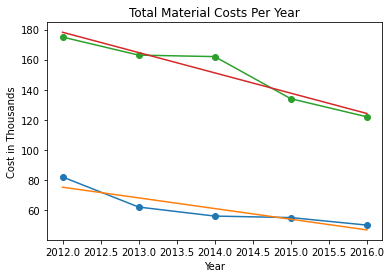

In [188]:
plt.plot(Year,median_Cost_in_Thousands,marker='o')
plt.plot(Year, m*Year + b)
plt.plot(Year,cost__75th_percentile_in_Thousands,marker='o')
plt.plot(Year, n*Year + c)
plt.title('Total Material Costs Per Year')
plt.xlabel('Year')
plt.ylabel('Cost in Thousands')
plt.show()

In [189]:
print('The line of best fit for annual median material costs is: y=',round(m,3),'x +',round(b,3),' while for annual material costs for stores at the 75th percentile it is y=',round(n,3),'x +',round(c,3))

The line of best fit for annual median material costs is: y= -7.1 x + 14360.4  while for annual material costs for stores at the 75th percentile it is y= -13.5 x + 27340.2


# Costs are dropping annually, and this model predicts median costs to be 39,000 dollars in 2022 and 110,000 dollars for the 75th percentile. This appears low especially for the median cost due to slightly nonlinear tendencies from the data